### Analysis of metatranscriptomic sequencing of Rhinolophus malayanus bats: feces samples(SRR12432009)

Blast hit analysis for NCBI accessions:
   
- Experiment: SRX8927795
- Run: SRR12432009
    
Data can be sourced from here: https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR12432009
        
All hits beloew have a >95% match to sequences in the NCBI nt database.

Dataset methods can be found in:

Zhou, H., Chen, X., Hu, T., Li, J., Song, H., Liu, Y., Wang, P., Liu, D., Yang, J., Holmes, E. C., Hughes, A. C., Bi, Y., & Shi, W. (2020). A Novel Bat Coronavirus Closely Related to SARS-CoV-2 Contains Natural Insertions at the S1/S2 Cleavage Site of the Spike Protein. Current Biology, 30(11), 2196-2203.e3. https://doi.org/10.1016/j.cub.2020.05.023

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from Bio import SeqIO

In [2]:
DATA_PATH='../../'
PROJECT='RmYN02'
BLAST_OUT=DATA_PATH+PROJECT+'/Blastn/dataframes/'

### Read in data

Takes formatted csv file(s) generated in Blast_hit_file_formatter.ipynb as input 

In [4]:
df = pd.read_csv(BLAST_OUT+PROJECT+'_project_blast_hits.csv')

In [5]:
len(df)

4428

### Uniqe sequence hits

Get all unique sequence hits, short from most to least frequennt, then plot the frequency

Note all percentages calculated below for taxonomic analysis are based on a percentage of the hits.

In [6]:
titles=df.text_title.to_list()

In [7]:
seqs, counts = np.unique(titles, return_counts=True)

In [8]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

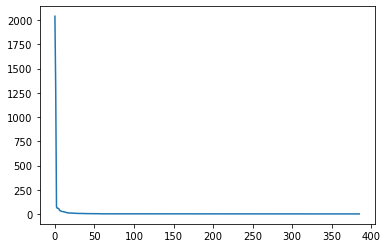

In [9]:
plt.plot(counts)

Most common ten frequencies

In [10]:
counts[:10]

(2040, 1293, 74, 59, 59, 53, 36, 34, 28, 26)

List all the unique sequence matches (in order from most to least common)

In [11]:
seqs

('Homo sapiens external transcribed spacer 18S ribosomal RNA gene, internal transcribed spacer 1, 5.8S ribosomal RNA gene, internal transcribed spacer 2, 28S ribosomal RNA gene, and external transcribed spacer, complete sequence,',
 'Homo sapiens external transcribed spacer 18S ribosomal RNA gene, internal transcribed spacer 1, 5.8S ribosomal RNA gene, internal transcribed spacer 2, 28S ribosomal RNA gene, and external transcribed spacer, complete sequence ,',
 'Felis catus Senzu DNA, chromosome: E1, American Shorthair breed,',
 'Streptomyces sp. AgN23 genome,',
 'Felis catus Senzu DNA, chromosome E1, American Shorthair breed ,',
 'PREDICTED: Lontra canadensis 28S ribosomal RNA (LOC116863405), rRNA,',
 'Streptomyces sp. AgN23 genome ,',
 'PREDICTED: Lontra canadensis 28S ribosomal RNA (LOC116863405), rRNA ,',
 'Shigella sonnei strain SE6-1 chromosome, complete genome,',
 'PREDICTED: Molossus molossus 28S ribosomal RNA (LOC118627438), rRNA,',
 'Methylobacterium brachiatum strain TX0642 

For SRR12432009 we can see that reads are dominated by Homo sapiens external transcribed spacer 18S ribosomal RNA gene. 

Percentage of human sequence matches in the raw reads

In [12]:
human = [x for x in titles if 'Human' in x]
homo_sapiens = [x for x in titles if 'Homo sapiens' in x]
homo_sapiens_18s = [x for x in titles if 'Homo sapiens external transcribed spacer 18S' in x]
print(f'Homo sapiens percentage: {((len(human)+len(homo_sapiens))/len(titles))*100}')
print(f'Homo sapiens external transcribed spacer 18S ribosomal RNA gene percentage: {((len(homo_sapiens_18s))/len(titles))*100}')

Homo sapiens percentage: 77.03252032520325
Homo sapiens external transcribed spacer 18S ribosomal RNA gene percentage: 75.31616982836495


In [13]:
non_human = [x for x in titles if not 'human' in x.lower()]
non_human = [x for x in non_human if not 'homo sapiens' in x.lower()]
non_h_seqs, non_h_counts = np.unique(non_human, return_counts=True)
non_h_counts, non_h_seqs = zip(*sorted(zip(non_h_counts, non_h_seqs), reverse=True))

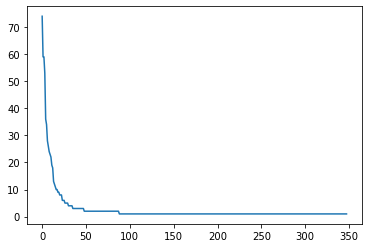

In [14]:
plt.plot(non_h_counts)

### Bat sequence content

Calculate percent of the following bat species and covs as percentage of the blast hits

In [37]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus']

In [38]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]

In [39]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 2.4841915085817527


### Other interesting Species and contaminants

Two other items in hit sequence matches is the abundance of carp, and also detection of 5 cloning vector sequences in this run of 4428 random blast hits.

In [40]:
carp=[x for x in titles if 'carpio' in x]

In [41]:
print(f'Carp percantage: {(len(carp)/len(titles))*100}')

Carp percantage: 2.935862691960253


### Cloning vectors

In [43]:
clonig_vectors=[x for x in titles if x.startswith('Cloning vector')]

In [44]:
clonig_vectors

['Cloning vector pCA-DEST2430, complete sequence ,',
 'Cloning vector pFosill-2, complete sequence ,',
 'Cloning vector pFosill-2, complete sequence ,',
 'Cloning vector pAAV-EF1A-Gephyrin.FingR-GFP-CCR5TC, complete sequence,',
 'Cloning vector pMSCV-syn-Gephyrin.FingR-GFP, complete sequence,']

In [45]:
cv_count=[]
for cv in clonig_vectors:
    cv_count.append(titles.count(cv))
print(f'Total number of cloning vector sequences detected: {sum(cv_count)}')

Total number of cloning vector sequences detected: 7


In [46]:
artifical=[x for x in titles if 'artificial' in x.lower()]
synthetic=[x for x in titles if 'synthetic' in x.lower()]

In [47]:
artifical, synthetic

(['Artificial DNA sequence synthesized ab initio by DNA polymerase of Thermus thermophilus, clone pTH262,',
  'Artificial DNA sequence synthesized ab initio by DNA polymerase of Thermus thermophilus, clone pTH262,'],
 ['Eukaryotic synthetic construct chromosome 14 ,',
  'Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17,'])

### Get indexes of synthetic sequences

idx is the zero indexed value of each raw read

In [48]:
cv_df=df.loc[df['text_title'].isin(clonig_vectors)]

In [49]:
cv_df

,idx,title,accession,hit_id,length,query_length,text_title,run,fastq
427,18650610,gi|1339549110|gb|MG188316.1| Cloning...,NaN,NaN,NaN,NaN,"Cloning vector pCA-DEST2430, complete sequence ,",0,BetaCoV_bat_Yunnan_RmYN02_2019_2.fq
562,2185058,gi|394782697|gb|JX069762.1| Cloning v...,NaN,NaN,NaN,NaN,"Cloning vector pFosill-2, complete sequence ,",0,BetaCoV_bat_Yunnan_RmYN02_2019_2.fq
571,26683341,gi|394782697|gb|JX069762.1| Cloning ...,NaN,NaN,NaN,NaN,"Cloning vector pFosill-2, complete sequence ,",0,BetaCoV_bat_Yunnan_RmYN02_2019_2.fq
64,15046421,gi|1860248574|gb|MT612432.1| Cloning vector p...,MT612432,gi|1860248574|gb|MT612432.1|,7010.0,150.0,Cloning vector pAAV-EF1A-Gephyrin.FingR-GFP-CC...,1,BetaCoV_bat_Yunnan_RmYN02_2019_1.fq
116,26860175,gi|1860248578|gb|MT612434.1| Cloning vector p...,MT612434,gi|1860248578|gb|MT612434.1|,7231.0,150.0,"Cloning vector pMSCV-syn-Gephyrin.FingR-GFP, c...",1,BetaCoV_bat_Yunnan_RmYN02_2019_1.fq


In [71]:
def get_reads(fpath, fname, idx_list):
    #havent found a quicker way to extract a specific index
    print(f'fpath: {fpath}, fname: {fname}, idx_list: {idx_list}')
    counter=0
    reads={}
    for record in SeqIO.parse(fpath+fname, "fastq"):
        if counter in idx_list and counter <= max(idx_list):
            reads[counter]=record
        counter+=1
        if counter> max(idx_list):
            break
    return reads

In [62]:
run_0=cv_df.loc[cv_df['run'] == 0]

In [63]:
reads=get_reads(DATA_PATH+PROJECT+'/', run_0['fastq'].to_list()[0], run_0['idx'].to_list())

fpath: ../../RmYN02/, fname: BetaCoV_bat_Yunnan_RmYN02_2019_2.fq, idx_list: [18650610, 2185058, 26683341]


In [67]:
run_0

,idx,title,accession,hit_id,length,query_length,text_title,run,fastq
427,18650610,gi|1339549110|gb|MG188316.1| Cloning...,NaN,NaN,NaN,NaN,"Cloning vector pCA-DEST2430, complete sequence ,",0,BetaCoV_bat_Yunnan_RmYN02_2019_2.fq
562,2185058,gi|394782697|gb|JX069762.1| Cloning v...,NaN,NaN,NaN,NaN,"Cloning vector pFosill-2, complete sequence ,",0,BetaCoV_bat_Yunnan_RmYN02_2019_2.fq
571,26683341,gi|394782697|gb|JX069762.1| Cloning ...,NaN,NaN,NaN,NaN,"Cloning vector pFosill-2, complete sequence ,",0,BetaCoV_bat_Yunnan_RmYN02_2019_2.fq


In [68]:
str(reads[18650610])

'ACTAGTATACTAGTATACTAGTATACTAGTATACTAGTATACTAGTATACTAGTATACTAGTATACTAGTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTCCTGTTAGGTGTAGATGTCGGTGGGCGGCGGGGGATTTAAAAGGGGG'

In [69]:
str(reads[2185058])

'CATATGTATATATGTACATATGTACATATGTACATATGTACATATATACATATGTACATATGTACATATGTACATATGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTCCTGGTAGGTGTTGTTGTCGGTGGGGGGGGGATCAGTAG'

In [70]:
str(reads[26683341])

'CATATGTACATATGTACATATGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTCCTGTTAGGTGTTGGTGTGGGTGGGGGGGGGCGGCTTACATAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG'

In [72]:
run_1=cv_df.loc[cv_df['run'] == 1]
reads=get_reads(DATA_PATH+PROJECT+'/', run_1['fastq'].to_list()[0], run_1['idx'].to_list())

fpath: ../../RmYN02/, fname: BetaCoV_bat_Yunnan_RmYN02_2019_1.fq, idx_list: [15046421, 26860175]


In [73]:
reads

{15046421: SeqRecord(seq=Seq('ATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGGGGTTTGTTTGCCG...CAC'), id='A00821:262:HWNC7DSXX:4:1547:24198:7200', name='A00821:262:HWNC7DSXX:4:1547:24198:7200', description='A00821:262:HWNC7DSXX:4:1547:24198:7200 1:N:0:CTTACTGG+CTAACAGG', dbxrefs=[]),
 26860175: SeqRecord(seq=Seq('CGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCG...GCT'), id='A00821:262:HWNC7DSXX:4:2316:19660:16626', name='A00821:262:HWNC7DSXX:4:2316:19660:16626', description='A00821:262:HWNC7DSXX:4:2316:19660:16626 1:N:0:CTTACTGG+CTAACAGG', dbxrefs=[])}

In [76]:
run_1

,idx,title,accession,hit_id,length,query_length,text_title,run,fastq
64,15046421,gi|1860248574|gb|MT612432.1| Cloning vector p...,MT612432,gi|1860248574|gb|MT612432.1|,7010.0,150.0,Cloning vector pAAV-EF1A-Gephyrin.FingR-GFP-CC...,1,BetaCoV_bat_Yunnan_RmYN02_2019_1.fq
116,26860175,gi|1860248578|gb|MT612434.1| Cloning vector p...,MT612434,gi|1860248578|gb|MT612434.1|,7231.0,150.0,"Cloning vector pMSCV-syn-Gephyrin.FingR-GFP, c...",1,BetaCoV_bat_Yunnan_RmYN02_2019_1.fq


In [74]:
str(reads[15046421].seq)

'ATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGGGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTTCTTCTAGTGTAGCCGTAGTTAGGCCAC'

In [75]:
str(reads[26860175].seq)

'CGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCT'